In [ ]:
!pip install kmodes


In [ ]:
!gdown 1ChRz-2_ighFQJI5CnDn58hbkz9Ns07fj
!gdown 1VkUZxGQW9pOC5RvQWa-8PyVVffOx5mIr

Downloading...
From: https://drive.google.com/uc?id=1ChRz-2_ighFQJI5CnDn58hbkz9Ns07fj
To: /content/Wholesale customers data.csv
100% 15.0k/15.0k [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VkUZxGQW9pOC5RvQWa-8PyVVffOx5mIr
To: /content/Customers.csv
100% 16.4k/16.4k [00:00<00:00, 34.9MB/s]


In [ ]:
!gdown 1QMLDJzez2sK4vChklwoNwyX5XjJNeStB

Downloading...
From: https://drive.google.com/uc?id=1QMLDJzez2sK4vChklwoNwyX5XjJNeStB
To: /content/marketing_campaign.csv
100% 220k/220k [00:00<00:00, 32.0MB/s]


# Import data

In [ ]:
import pandas as pd
customers = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
customers = customers[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency', 'Kidhome', 'Teenhome', 'Complain']]
customers = customers.dropna()

# K-Prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.util.dissim import jaccard_dissim_label
import pandas as pd

kproto = KPrototypes(n_clusters=3, cat_dissim=jaccard_dissim_label, n_init=10, verbose=2,random_state=42)
clusters = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns

# Access cluster centroids
customers['cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 515, ncost: 536968886750.60144
Run: 1, iteration: 2/100, moves: 101, ncost: 533081557354.0109
Run: 1, iteration: 3/100, moves: 91, ncost: 530793247417.2929
Run: 1, iteration: 4/100, moves: 54, ncost: 530037955390.6936
Run: 1, iteration: 5/100, moves: 44, ncost: 529427263738.24536
Run: 1, iteration: 6/100, moves: 40, ncost: 528966000414.24524
Run: 1, iteration: 7/100, moves: 14, ncost: 528887491538.46454
Run: 1, iteration: 8/100, moves: 15, ncost: 528816752504.75354
Run: 1, iteration: 9/100, moves: 8, ncost: 528795307933.8484
Run: 1, iteration: 10/100, moves: 7, ncost: 528784774880.68604
Run: 1, iteration: 11/100, moves: 0, ncost: 528784774880.68604
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 112, ncost: 535603059885.1808
Run: 2, ite

In [ ]:
kproto.cluster_centroids_

array([['1972.5', '221604.5', '48.625', '0.375', '0.25', '0.0', '1.0',
        'PhD', 'Together'],
       ['1966.578801843318', '69515.41751152073', '49.0258064516129',
        '0.15391705069124423', '0.5447004608294931',
        '0.0064516129032258064', '1.9981566820276497', 'Graduation',
        'Married'],
       ['1970.959928762244', '34356.94122885129', '49.0026714158504',
        '0.7203918076580588', '0.4692787177203918',
        '0.012466607301869992', '0.0', 'Graduation', 'Married']],
      dtype='<U32')

In [ ]:
customers.groupby('cluster').aggregate('mean')

<ipython-input-41-59b33a8306cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers.groupby('cluster').aggregate('mean')


,Year_Birth,Income,Recency,Kidhome,Teenhome,Complain
cluster,,,,,,
0,1970.963523,34372.591637,49.004448,0.719751,0.469751,0.012456
1,1972.500000,221604.500000,48.625000,0.375000,0.250000,0.000000
2,1966.571033,69531.623616,49.023985,0.154059,0.544280,0.006458


# Evaluate

## Get evaluate score

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical = customers.select_dtypes(include=['object']).columns
X = customers.drop(categorical, axis=1)
X = X.to_numpy()

encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(customers[categorical])

X = np.concatenate((X, categorical_data), axis=1)



In [ ]:
import numpy as np
import pandas as pd


def transform_dataframe(df, encoder):
  X = df.drop(categorical, axis=1)
  X = X.to_numpy()
  categorical_data = encoder.transform(df[categorical])
  X = np.concatenate((X, categorical_data), axis=1)
  return X

In [ ]:
X = transform_dataframe(customers, encoder)


In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt


X = transform_dataframe(customers, encoder)

silhouettes = []
costs = []
for k in range(2,10):
# Assuming 'data' is your mixed-type dataframe
  kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2, random_state=42)
  clusters = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns
  silhouettes.append(silhouette_score(X, clusters))
  costs.append(kproto.cost_)




## Silhouette score

Text(0, 0.5, 'Silhouette score')

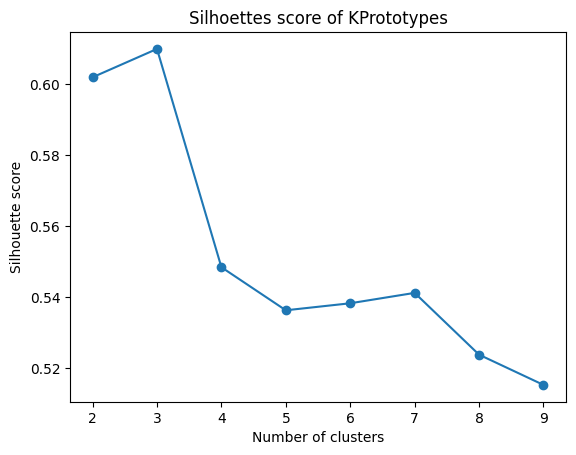

In [ ]:

plt.plot(range(2,10), silhouettes, marker='o')
plt.title('Silhoettes score of KPrototypes')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## Costs

Text(0, 0.5, 'Cost')

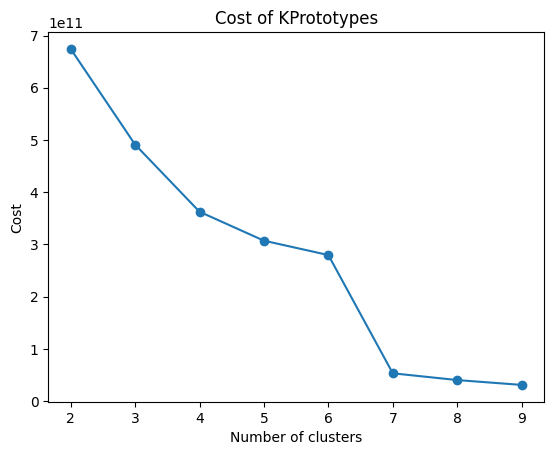

In [ ]:

plt.plot(range(2,10), costs, marker='o')
plt.title('Cost of KPrototypes')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')

## Scatter plot

In [ ]:
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
import pandas as pd

pca = PCA(n_components=2)
X_two_dim = pca.fit_transform(X)


k = 3
kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns



Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 515, ncost: 536971068994.39545
Run: 1, iteration: 2/100, moves: 101, ncost: 533083739793.87885
Run: 1, iteration: 3/100, moves: 91, ncost: 530795429995.0281
Run: 1, iteration: 4/100, moves: 54, ncost: 530040138063.9534
Run: 1, iteration: 5/100, moves: 44, ncost: 529429446545.0571
Run: 1, iteration: 6/100, moves: 40, ncost: 528968183269.285
Run: 1, iteration: 7/100, moves: 14, ncost: 528889674431.0959
Run: 1, iteration: 8/100, moves: 15, ncost: 528818935433.27124
Run: 1, iteration: 9/100, moves: 8, ncost: 528797490876.13904
Run: 1, iteration: 10/100, moves: 7, ncost: 528786957829.10657
Run: 1, iteration: 11/100, moves: 0, ncost: 528786957829.10657
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 112, ncost: 535605242185.8683
Run: 2, itera

Text(0, 0.5, 'PCA Component 2')

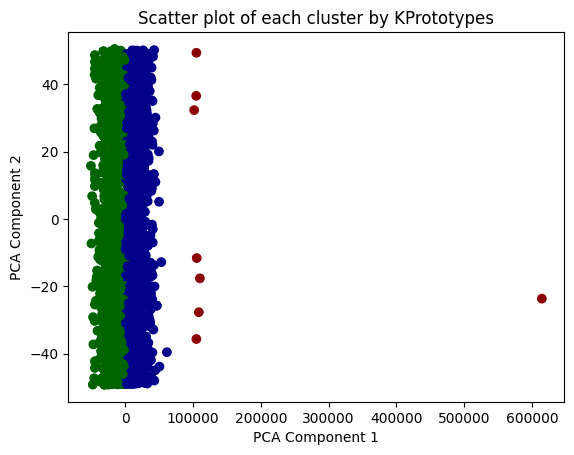

In [ ]:

colors = ['darkred', 'darkblue', 'darkgreen']
plt.scatter(X_two_dim[:,0], X_two_dim[:,1], c=[colors[i] for i in clusters])
plt.title('Scatter plot of each cluster by KPrototypes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

## Compare with KMeans

In [ ]:
from sklearn.cluster import KMeans


k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'PCA Component 2')

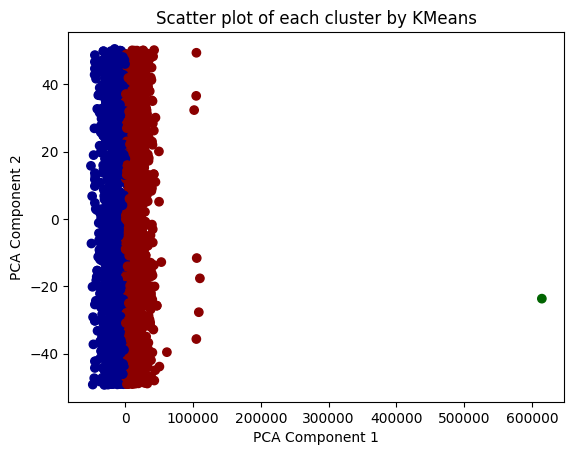

In [ ]:

colors = ['darkred', 'darkblue', 'darkgreen']
plt.scatter(X_two_dim[:,0], X_two_dim[:,1], c=[colors[i] for i in clusters_kmeans])
plt.title('Scatter plot of each cluster by KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

### Scatter plot

In [ ]:
customers = customers.drop(['cluster'], axis=1)

In [ ]:
customers = customers.drop(['cluster_kprototypes', 'cluster_kmeans'], axis=1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X and customers are defined and available in your code

pca = PCA(n_components=2, random_state=42)
pca_customers = pca.fit_transform(X)

k = 7  # Number of clusters


kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns
customers['cluster_kprototypes'] = clusters

# Using K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)
customers['cluster_kmeans'] = clusters_kmeans


# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot by PCA for HAC
axs[0].scatter(x=pca_customers[:, 0], y=pca_customers[:, 1], c=[colors[i] for i in customers['cluster_kprototypes']])
axs[0].set_title('KPrototypes clustering - Blue and Red Points')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Plot by PCA for K-Means
axs[1].scatter(x=pca_customers[:, 0], y=pca_customers[:, 1], c=[colors[i] for i in customers['cluster_kmeans']])
axs[1].set_title('K-Means Clustering - Blue and Red Points')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


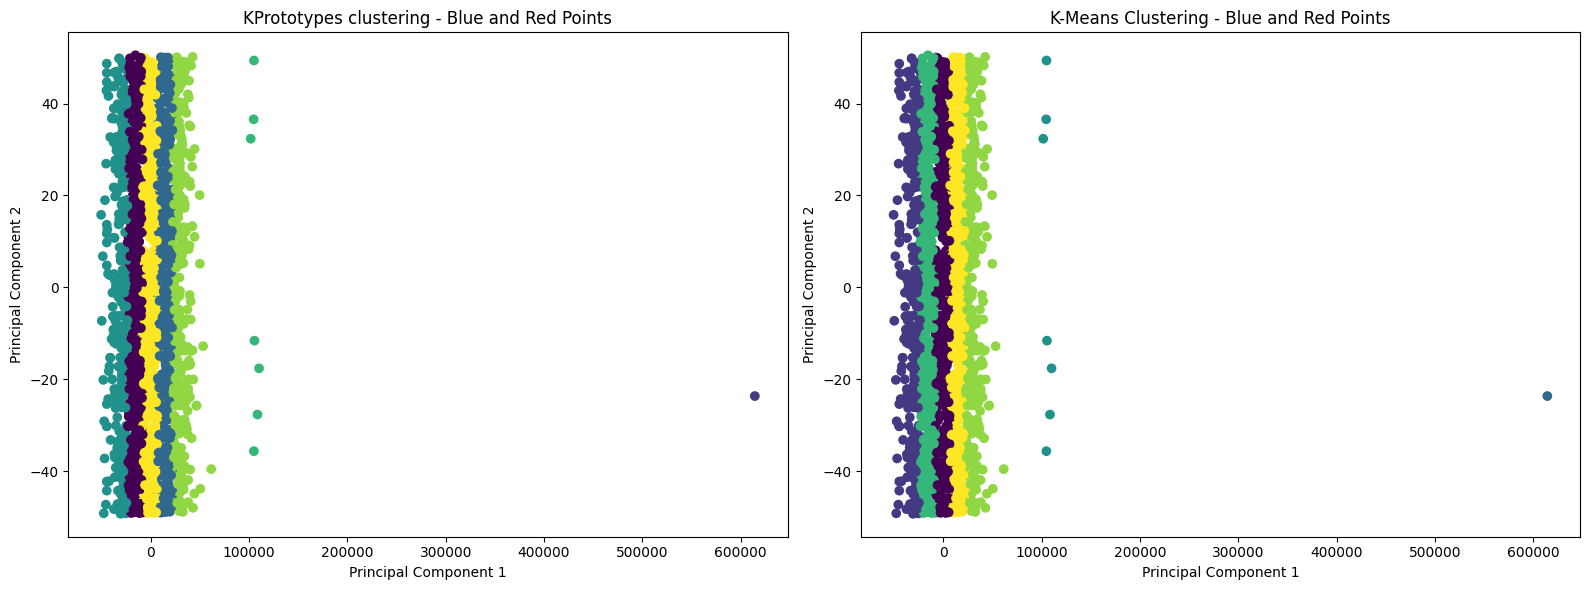

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot by PCA for HAC
axs[0].scatter(x=pca_customers[:, 0], y=pca_customers[:, 1], c=customers['cluster_kprototypes'])
axs[0].set_title('KPrototypes clustering - Blue and Red Points')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Plot by PCA for K-Means
axs[1].scatter(x=pca_customers[:, 0], y=pca_customers[:, 1], c=customers['cluster_kmeans'])
axs[1].set_title('K-Means Clustering - Blue and Red Points')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

### Silhouette scores

In [ ]:
customers = customers.drop(['cluster_kprototypes', 'cluster_kmeans'], axis=1)

In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.util.dissim import jaccard_dissim_label
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Range of clusters to try
k_values = range(2, 11)  # You can adjust this range

# Store silhouette scores for each k
silhouette_scores_kmeans = []
silhouette_scores_kprototypes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters_kmeans)
    silhouette_scores_kmeans.append(silhouette_avg)

    kproto = KPrototypes(n_clusters=k, cat_dissim=jaccard_dissim_label, init='Cao', n_jobs=-1, verbose=2, n_init=10, random_state=42)
    clusters_kprototypes = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns
    silhouette_avg = silhouette_score(X, clusters_kprototypes)
    silhouette_scores_kprototypes.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9


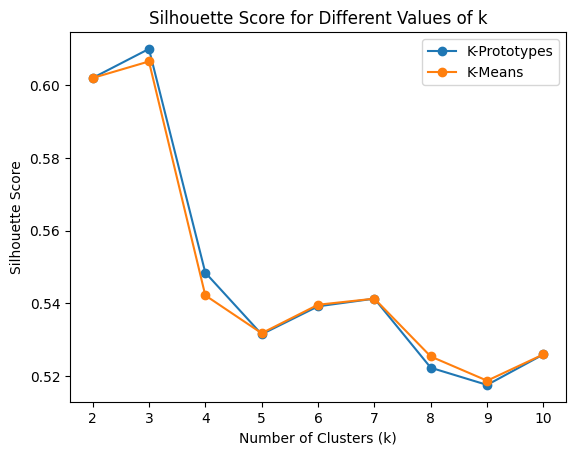

In [ ]:

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores_kprototypes, marker='o', label='K-Prototypes')
plt.plot(k_values, silhouette_scores_kmeans, marker='o', label='K-Means')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [ ]:
plt.plot(k_values, silhouette_scores_kprototypes, marker='o', label='K-Prototypes')
plt.title('Silhouette Score for K-Prototype')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

## Silhouette của jaccard dissim và similar dissim

In [ ]:
customers = customers.drop(['cluster_kprototypes', 'cluster_kmeans'], axis=1)

In [ ]:
customers.head()


,Year_Birth,Education,Marital_Status,Income,Recency,Kidhome,Teenhome,Complain
0,1957,Graduation,Single,58138.0,58,0,0,0
1,1954,Graduation,Single,46344.0,38,1,1,0
2,1965,Graduation,Together,71613.0,26,0,0,0
3,1984,Graduation,Together,26646.0,26,1,0,0
4,1981,PhD,Married,58293.0,94,1,0,0


In [ ]:
k = 3

kproto = KPrototypes(n_clusters=k, verbose=2, n_init=5, n_jobs=-1, random_state=42)
clusters_kprototypes = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns
silhouette_avg = silhouette_score(X, clusters_kprototypes)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.util.dissim import matching_dissim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Range of clusters to try
k_values = range(2, 11)  # You can adjust this range

# Store silhouette scores for each k
silhouette_scores_simple = []
silhouette_scores_jaccarb = []

for k in k_values:
    kproto = KPrototypes(n_clusters=k, verbose=2, cat_dissim=matching_dissim, n_jobs=-1, n_init=10, random_state=42)
    clusters_kprototypes = kproto.fit_predict(customers, categorical=[1, 2])  # Specify the indices of categorical columns
    silhouette_avg = silhouette_score(X, clusters_kprototypes)
    silhouette_scores_simple.append(silhouette_avg)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9


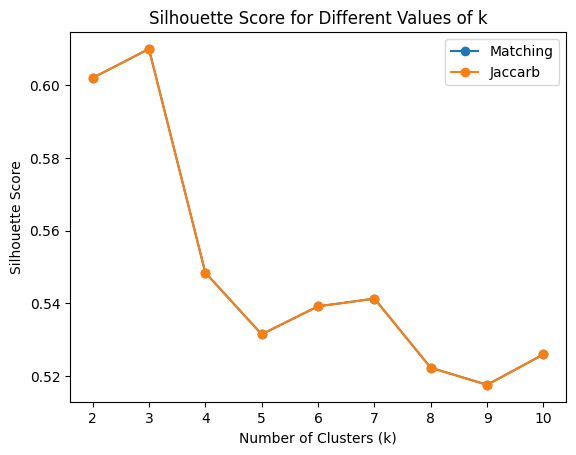

In [ ]:
# Plot the silhouette scores
plt.plot(k_values, silhouette_scores_simple, marker='o', label='Matching')
plt.plot(k_values, silhouette_scores_kprototypes, marker='o', label='Jaccarb')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [ ]:
np.array(silhouette_scores_simple) - np.array(silhouette_scores_kprototypes)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.44007426e-05,
       1.20583961e-05])